In [1]:
import numpy as np
import matplotlib.pyplot
import pandas as pd
from tqdm import tqdm
import glob
import time
import timeit
import numpy as np
import cv2
import matplotlib.pyplot as plt
from functions import *
from old_tracking import track as old_track
from assia_tracking_1 import track_motion as assia_track

input_video = "/home/tom/Documents/Hackathon_videos/to_15/Video1_TO15.avi"

path_and_name = "/home/tom/Code/Hackathon_2025/mousetracker/metrics_tom/old_traj"

res = assia_track(input_video)


In [10]:
res_array[:,0]
# res

array([ 85,  83,  85, ..., 188, 187, 185], shape=(17958,))

In [9]:
res_array
# x,y,t,_ = old_track(input_video)

array([[ 85, 272],
       [ 83, 271],
       [ 85, 267],
       ...,
       [188, 323],
       [187, 322],
       [185, 321]], shape=(17958, 2))

In [ ]:
res_array = np.array(res[1])

x = res_array[:,0]
y = res_array[:,1]
t = (np.arange(len(res_array))+1)/25

path_and_name = "/home/tom/Code/Hackathon_2025/mousetracker/metrics_tom/assia_traj_1"


save_traj_to_csv(x,y,t, path_and_name=path_and_name)

In [12]:
x,y,t = read_csv_traj("/home/tom/Code/Hackathon_2025/mousetracker/metrics_tom/old_traj")

In [22]:
def compute_speed(x,y,t):

    dx_arr = np.diff(x)
    dy_arr = np.diff(y)
    dt_arr = np.diff(t)

    v = np.sqrt(dx_arr**2 + dx_arr**2)/dt_arr

    return v

def count_speeds_above_threshold(x,y,t,thr):

    """
    Compute the proportion of speed above the threshold.
    """

    v = compute_speed(x,y,t)

    # Convert the threshold units from cm/s to pixels/s
    arena_width_cm = 84
    arena_width_pixels = 453
    coef = arena_width_cm/arena_width_pixels

    cutting_thr = thr/coef

    # Find where speed is above the threshold
    where_above_thr = np.where(v>thr,1,0)

    # Count the number of places matching the condition
    nb_above_thr = np.sum(where_above_thr)

    return nb_above_thr/len(v)

# n_jumps = count_speeds_above_threshold(v,200)

print(n_jumps)

3283


np.float64(17957.0)

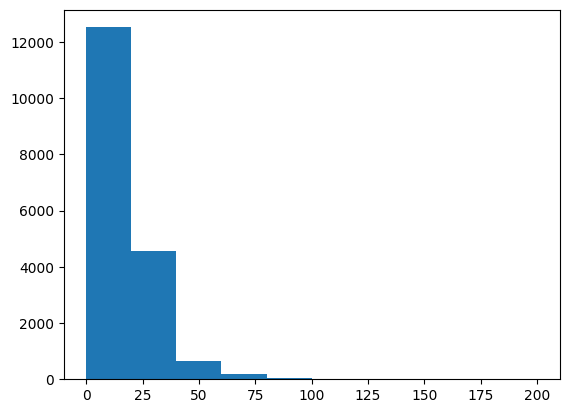

In [6]:
# conversion factor

arena_width_cm = 84
arena_width_pixels = 453

coef = arena_width_cm/arena_width_pixels

cutting_thr = 200/coef

values = plt.hist(coef*v, range=(0,200))

np.sum(values[0])

In [15]:
130000/3600

36.111111111111114

In [21]:
len(v)

17933

In [15]:
arena_width_cm = 84
arena_width_pixels = 453

coef = arena_width_cm/arena_width_pixels



In [18]:
5/coef/25

1.0785714285714285

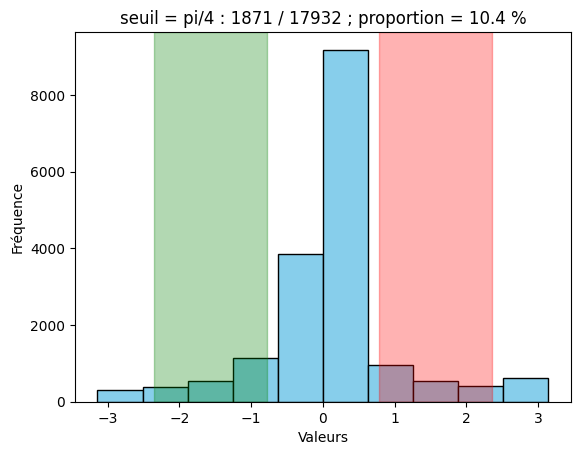

seuil = pi/4 : 1871 / 17932 ; proportion = 10.4 %


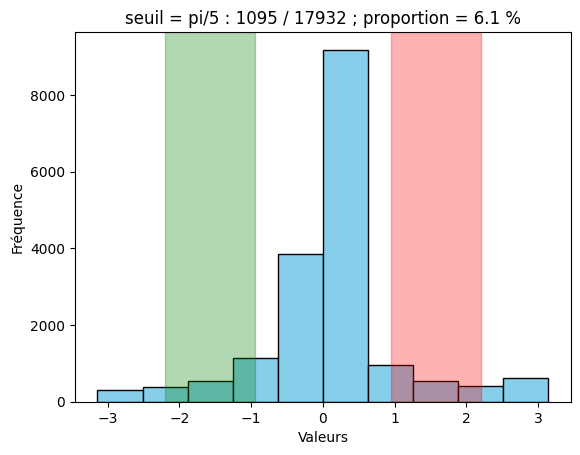

seuil = pi/5 : 1095 / 17932 ; proportion = 6.1 %


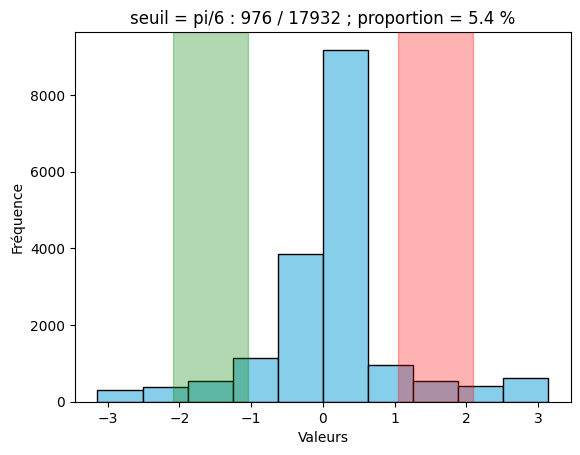

seuil = pi/6 : 976 / 17932 ; proportion = 5.4 %


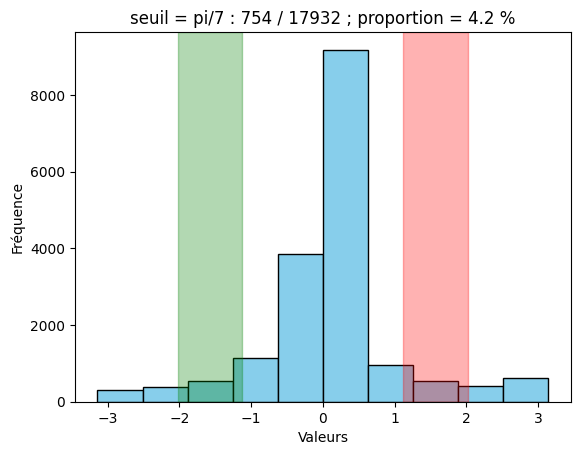

seuil = pi/7 : 754 / 17932 ; proportion = 4.2 %


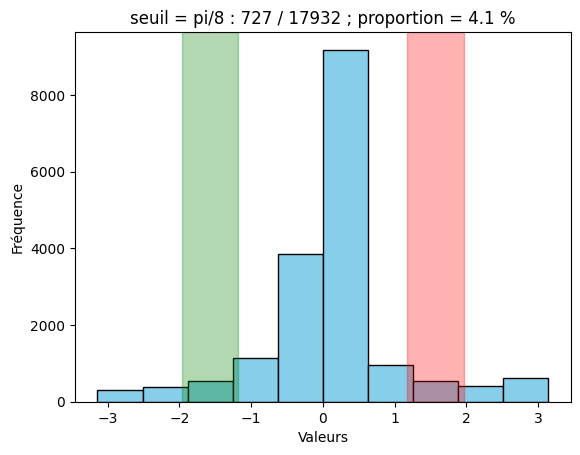

seuil = pi/8 : 727 / 17932 ; proportion = 4.1 %


In [ ]:






def plot_histo(liste, titre, seuil):

    plt.hist(liste, bins=10, color='skyblue', edgecolor='black')

    # Positions des intervalles
    pi_2 = np.pi / 2
    neg_pi_2 = -np.pi / 2 # remappé dans [0, 2π] ≈ 4.71

    # Afficher des bandes verticales transparentes
    plt.axvspan(pi_2 - seuil, pi_2 + seuil, color='red', alpha=0.3, label='+π/2 ± seuil')
    plt.axvspan(neg_pi_2 - seuil, neg_pi_2 + seuil, color='green', alpha=0.3, label='−π/2 ± seuil')
    plt.title(titre)
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.show()

def angle_oriente(x1,y1,x2,y2):

    """Returns the oriented angle in radian between two vectors """

    cross_product = x1 * y2 - y1 * x2  # produit vectoriel en 2D
    dot_product = x1 * x2 + y1 * y2  # produit scalaire
    angle = np.arctan2(cross_product, dot_product)

    return angle  # en radians, dans [-π, π]

def compute_speeds(x,t):
    dx=np.diff(x)
    dt = np.diff(t)
    v = dx / dt
    return v

def compute_angles(x,y,t):

    vx = compute_speeds(x,t)
    vy = compute_speeds(y,t)
    angles = angle_oriente(vx[:-1], vy[:-1], vx[1:], vy[1:])

    return(angles)

def count_angle_above_threshold(angles,thr):

    where_above_thr = np.where(np.abs(angles)>thr,1,0)
    nb_above_thr = np.sum(where_above_thr)

    return nb_above_thr
    
def plot_counts_discarded_angles(angles):

    n = len(angles)
    thresholds = np.linspace(0,np.pi, n)
    counts = [count_angle_above_threshold(angles,thr) for thr in thresholds]

    plt.plot(thresholds, counts, label="Counts en fonction du seuil de l'angle", linewidth=1)
    plt.legend()
    plt.title("Trajectoire avec changements brusques")
    plt.show()


def count_bad_angles(angles, seuil):

    angles = np.array(angles)
    # Normaliser les angles dans [-π, π]
    angles = (angles + np.pi) % (2 * np.pi) - np.pi

    count_bad_angle = np.sum((angles >= (-np.pi / 2 - seuil)) & (angles <= (-np.pi / 2 + seuil)))
    
    return count_bad_angle


# filename = r"C:\Users\thoma\Documents\ASciences\AAMU\HACKATON\Hackathon_videos\to_15\Video1_TO15"
# # filename = r"C:\Users\thoma\Documents\ASciences\AAMU\HACKATON\assia_t0_15_1"
# x,y,t = read_csv_traj(filename)
angles=compute_angles(x,y,t)
n=len(angles)


# plot_counts_discarded_angles_with_threshold(angles)

for diviseur in  [4,5,6,7,8]:
    
    seuil = np.pi / diviseur
    bad_angles = count_bad_angles(angles, np.pi/diviseur)
    plot_histo(angles, f"seuil = pi/{diviseur} : {bad_angles} / {n} ; proportion = {round(bad_angles/n*100, 1)} %", seuil)
    print(f"seuil = pi/{diviseur} : {bad_angles} / {n} ; proportion = {round(bad_angles/n*100, 1)} %")

In [ ]:
def angle_oriente(x1,y1,x2,y2):

    """Returns the oriented angle in radian between two vectors """

    cross_product = x1 * y2 - y1 * x2  # produit vectoriel en 2D
    dot_product = x1 * x2 + y1 * y2  # produit scalaire
    angle = np.arctan2(cross_product, dot_product)

    return angle  # en radians, dans [-π, π]

def compute_angles(x,y,t):

    vx = compute_speeds(x,t)
    vy = compute_speeds(y,t)
    angles = angle_oriente(vx[:-1], vy[:-1], vx[1:], vy[1:])

    return(angles)

def count_bad_angles(x,y,t,seuil):

    angles = compute_angles(x,y,t)

    angles = np.array(angles)
    # Normaliser les angles dans [-π, π]
    angles = (angles + np.pi) % (2 * np.pi) - np.pi

    count_bad_angle = np.sum((angles >= (-np.pi / 2 - seuil)) & (angles <= (-np.pi / 2 + seuil)))
    
    return count_bad_angle/len(angles)